In [127]:
import torch
import pandas as pd

In [128]:
df = pd.read_csv('recipes_train.csv')
df.head(20)
print(df.shape)
print(df.columns)

(1469, 385)
Index(['id', 'cuisine', 'almond', 'angelica', 'anise', 'anise_seed', 'apple',
       'apple_brandy', 'apricot', 'armagnac',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=385)


In [143]:
df.describe()

,id,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,1469.000000,1469.000000,1469.0,1469.000000,1469.000000,1469.000000,1469.0,1469.000000,1469.0,1469.000000,...,1469.0,1469.000000,1469.000000,1469.000000,1469.000000,1469.0,1469.000000,1469.000000,1469.000000,1469.000000
mean,735.000000,0.019061,0.0,0.000681,0.002723,0.016338,0.0,0.006127,0.0,0.002042,...,0.0,0.001361,0.019741,0.005446,0.055820,0.0,0.002723,0.010892,0.055820,0.006807
std,424.208086,0.136785,0.0,0.026091,0.052128,0.126814,0.0,0.078059,0.0,0.045160,...,0.0,0.036886,0.139157,0.073620,0.229653,0.0,0.052128,0.103829,0.229653,0.082253
min,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,368.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,735.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1102.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1469.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [129]:
df_data = df.iloc[:,2:]
df_t = df_data.transpose()
df_data.describe().loc['max'] != 0

df_data_new = df_t.loc[df.describe().loc['max'] != 0].transpose()
#df_data_new #去除掉了全0的食材，还剩263种

In [130]:
df_info = df.loc[:,['id','cuisine']]
df_new = df_info.join(df_data_new)
#df_new #去除掉了全0食材的总数据，还剩263种

{'chinese': 268, 'indian': 351, 'japanese': 191, 'korean': 488, 'thai': 171}


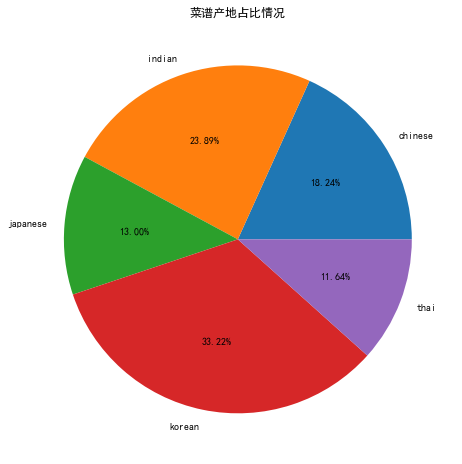

In [147]:
cuisine_sum = {} #统计各地区菜品种类
food_sum = {} #统计各地区分别使用食材的数量
for name,group in df_new.groupby('cuisine'):
    cuisine_sum[name] = group.shape[0]
    food_sum[name] = {}
    for col in group.columns.values.tolist()[2:]:
        food_sum[name][col] = group[col].sum()
print(cuisine_sum)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'simhei'
data = cuisine_sum.values()
label =  cuisine_sum.keys()
plt.pie(data, labels = label, autopct='%.2f%%')
plt.title('菜谱产地占比情况')
plt.savefig("cuisine_pie_chart.png")

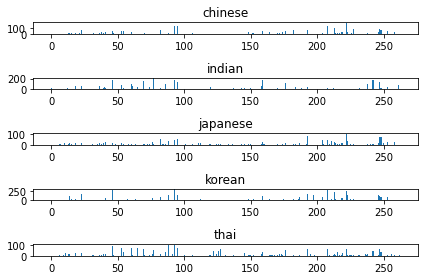

In [132]:
#作出学长图的改进 -- 去除全0食材
import matplotlib.pyplot as plt
%matplotlib inline
subplot_count = len(cuisine_sum.keys())
for i in range(subplot_count):
    location = list(cuisine_sum.keys())[i]
    plt.subplot(subplot_count, 1, i+1) #subplot_count行 * 1列，第i+1个
    plt.bar(range(len(food_sum[location].keys())), food_sum[location].values())
    plt.title(location)
plt.tight_layout()

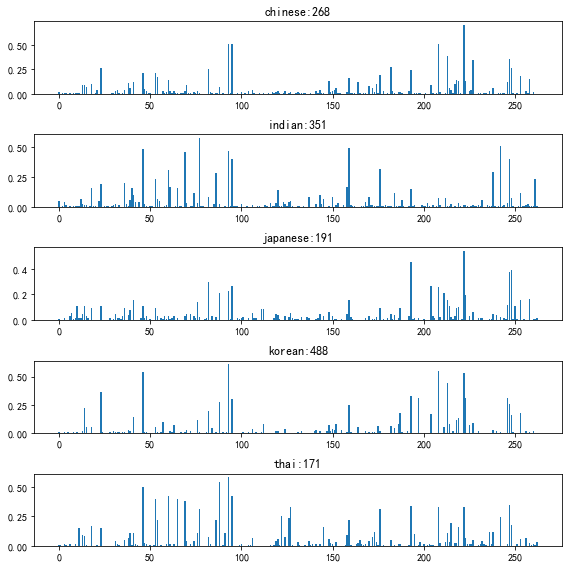

In [148]:
#作出学长图的改进 -- 去除全0食材并算概率
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(8, 8)
subplot_count = len(cuisine_sum.keys())
for i in range(subplot_count):
    location = list(cuisine_sum.keys())[i]
    plt.subplot(subplot_count, 1, i+1) #subplot_count行 * 1列，第i+1个
    #print(cuisine_sum[location])
    tmplist = list(food_sum[location].values())
    tmplist = [x/cuisine_sum[location] for x in tmplist]
    plt.bar(range(len(food_sum[location].keys())), tmplist)
    plt.title(location+':'+str(cuisine_sum[location]))

plt.tight_layout()
plt.savefig("cuisine_bar_chart.png")

In [134]:
df_new.values

array([[1, 'indian', 0, ..., 0, 0, 0],
       [2, 'chinese', 0, ..., 0, 0, 0],
       [3, 'chinese', 0, ..., 0, 0, 0],
       ...,
       [1467, 'chinese', 0, ..., 0, 0, 0],
       [1468, 'chinese', 0, ..., 0, 0, 0],
       [1469, 'chinese', 0, ..., 0, 0, 0]], dtype=object)

In [135]:
df_colsum = df_data_new.apply(lambda x: x.sum())
df_colsum.values.tolist()

[28,
 1,
 4,
 24,
 9,
 3,
 14,
 10,
 7,
 10,
 25,
 35,
 26,
 66,
 173,
 52,
 3,
 3,
 151,
 2,
 2,
 12,
 17,
 362,
 3,
 4,
 1,
 2,
 4,
 3,
 14,
 32,
 17,
 11,
 1,
 13,
 110,
 7,
 61,
 77,
 55,
 181,
 17,
 1,
 14,
 2,
 598,
 30,
 23,
 1,
 6,
 1,
 1,
 244,
 117,
 16,
 5,
 52,
 11,
 12,
 223,
 78,
 6,
 46,
 2,
 128,
 2,
 7,
 2,
 241,
 59,
 2,
 19,
 1,
 58,
 5,
 122,
 265,
 2,
 2,
 1,
 5,
 257,
 7,
 29,
 9,
 146,
 1,
 295,
 1,
 7,
 19,
 3,
 742,
 6,
 545,
 1,
 3,
 5,
 2,
 17,
 6,
 1,
 1,
 13,
 1,
 54,
 4,
 5,
 2,
 3,
 18,
 54,
 4,
 2,
 1,
 12,
 7,
 7,
 38,
 83,
 4,
 46,
 16,
 48,
 1,
 59,
 89,
 4,
 1,
 2,
 17,
 4,
 13,
 2,
 3,
 4,
 38,
 4,
 2,
 7,
 31,
 3,
 60,
 9,
 59,
 1,
 7,
 92,
 15,
 60,
 22,
 68,
 13,
 1,
 11,
 6,
 2,
 91,
 406,
 15,
 5,
 2,
 2,
 64,
 10,
 4,
 4,
 30,
 1,
 67,
 4,
 40,
 30,
 40,
 37,
 241,
 1,
 14,
 4,
 6,
 1,
 119,
 7,
 70,
 2,
 49,
 110,
 26,
 1,
 1,
 9,
 14,
 422,
 2,
 27,
 3,
 156,
 8,
 4,
 4,
 2,
 12,
 3,
 156,
 12,
 2,
 2,
 537,
 18,
 1,
 66,
 33,
 369,
 79,
 57

In [136]:
df_colsum.describe() #max = 742
df_colsum[df_colsum == 742] #garlic 742
df_new[['cuisine','garlic']]

,cuisine,garlic
0,indian,0
1,chinese,0
2,chinese,0
3,korean,1
4,thai,0
...,...,...
1464,indian,0
1465,korean,1
1466,chinese,0
1467,chinese,0


{'whiskers': [<matplotlib.lines.Line2D at 0x29e03235fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x29e03a82630>,
 'boxes': [<matplotlib.lines.Line2D at 0x29e03235f98>],
 'medians': [<matplotlib.lines.Line2D at 0x29e03a82b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x29e03a82c88>],
 'means': []}

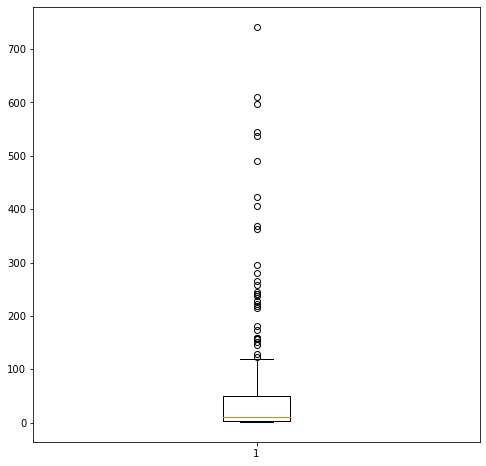

In [137]:
plt.boxplot(df_colsum.tolist())

In [138]:
num_count={}
for i in df_colsum:
    if i not in num_count:
        num_count[i]=1
    else:
        num_count[i]+=1
num_count = dict(sorted(num_count.items(),key=lambda x:x[0]))
print(f'max key number:{max(num_count.keys())}')
print(f'max item number:{max(num_count.values())}')
print(num_count)

max key number:742
max item number:30
{1: 30, 2: 27, 3: 16, 4: 19, 5: 8, 6: 7, 7: 10, 8: 4, 9: 5, 10: 5, 11: 3, 12: 6, 13: 4, 14: 5, 15: 3, 16: 4, 17: 5, 18: 3, 19: 2, 22: 2, 23: 1, 24: 1, 25: 1, 26: 2, 27: 1, 28: 2, 29: 2, 30: 3, 31: 2, 32: 1, 33: 1, 35: 1, 37: 2, 38: 2, 40: 2, 46: 2, 48: 2, 49: 1, 52: 2, 54: 2, 55: 1, 57: 1, 58: 1, 59: 3, 60: 2, 61: 1, 64: 1, 66: 2, 67: 1, 68: 1, 70: 1, 77: 1, 78: 1, 79: 1, 82: 2, 83: 1, 89: 1, 91: 1, 92: 1, 110: 2, 115: 1, 117: 1, 119: 1, 122: 1, 128: 1, 146: 1, 151: 1, 156: 2, 158: 2, 159: 1, 173: 1, 181: 1, 214: 1, 218: 1, 223: 1, 228: 1, 237: 1, 241: 2, 244: 1, 257: 1, 265: 1, 281: 1, 295: 1, 362: 1, 369: 1, 406: 1, 422: 1, 490: 1, 537: 1, 545: 1, 598: 1, 611: 1, 742: 1}


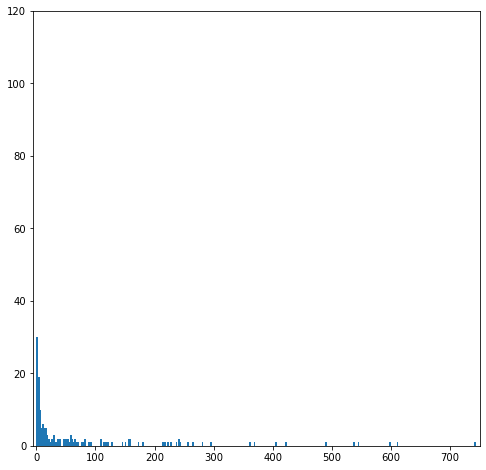

In [140]:
plt.bar(x = num_count.keys(),height=num_count.values(),width = 3)
plt.xlim(-5,750)
plt.ylim(0,120)
plt.savefig("ingredients_Bar_chart.png")

In [114]:
for name,group in df.groupby("cuisine"):
    print(name)
    print(type(group))
    print(group.loc[:,'cuisine'].iloc[0])
    print('*' * 30)

chinese
<class 'pandas.core.frame.DataFrame'>
chinese
******************************
indian
<class 'pandas.core.frame.DataFrame'>
indian
******************************
japanese
<class 'pandas.core.frame.DataFrame'>
japanese
******************************
korean
<class 'pandas.core.frame.DataFrame'>
korean
******************************
thai
<class 'pandas.core.frame.DataFrame'>
thai
******************************


In [22]:
#学长提供代码
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 拆分训练数据
train_x = df_new.drop(columns=["id","cuisine"]).values
train_y = df_new.loc[:,'cuisine'].values

# 分割训练集验证集
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=4)

# 使用lr模型
model = LogisticRegression(penalty="l1", C=0.5, solver="liblinear")

# 训练模型
model.fit(X_train, y_train)
print("train accuracy:", accuracy_score(model.predict(X_train), y_train))
print("valid accuracy:", accuracy_score(model.predict(X_valid), y_valid))

train accuracy: 0.8485106382978723
valid accuracy: 0.7482993197278912


In [23]:
#L1,L2以及各个优化算法都试一试
algorithm = {'l1':['liblinear'],'l2':['newton-cg','liblinear']}
epoch = 20
# 分割训练集验证集
for penalty_now in algorithm.keys():
    for solver_now in algorithm[penalty_now]:
        print(f'penalty:{penalty_now}    solver:{solver_now}')
        train_ac = []
        valid_ac = []
        for rs in range(epoch):
            X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=rs+1)

            # 使用lr模型
            model = LogisticRegression(penalty=penalty_now, C=0.5, solver=solver_now)

            # 训练模型
            model.fit(X_train, y_train)
            train_ac.append(accuracy_score(model.predict(X_train), y_train))
            valid_ac.append(accuracy_score(model.predict(X_valid), y_valid))
        print(train_ac)
        print(f'average train_ac:{sum(train_ac)/epoch}')
        print(valid_ac)
        print(f'average valid_ac:{sum(valid_ac)/epoch}')
        print('-'*15)

penalty:l1    solver:liblinear
[0.8357446808510638, 0.8272340425531914, 0.8306382978723404, 0.8485106382978723, 0.8323404255319149, 0.8297872340425532, 0.8348936170212766, 0.8314893617021276, 0.8442553191489361, 0.8297872340425532, 0.8246808510638298, 0.8391489361702128, 0.828936170212766, 0.828936170212766, 0.8263829787234043, 0.8246808510638298, 0.8357446808510638, 0.8323404255319149, 0.8391489361702128, 0.8187234042553192]
average train_ac:0.8321702127659574
[0.7312925170068028, 0.7585034013605442, 0.7959183673469388, 0.7482993197278912, 0.7653061224489796, 0.8163265306122449, 0.7414965986394558, 0.7517006802721088, 0.7448979591836735, 0.7789115646258503, 0.8095238095238095, 0.782312925170068, 0.7993197278911565, 0.7993197278911565, 0.8027210884353742, 0.782312925170068, 0.7857142857142857, 0.7925170068027211, 0.7551020408163265, 0.8163265306122449]
average valid_ac:0.7778911564625851
---------------
penalty:l2    solver:newton-cg
[0.8808510638297873, 0.8834042553191489, 0.876595744

In [218]:
#model = (penalty="l2", C=0.5, solver="newton-cg")
# 拆分训练数据
train_x = df_new.drop(columns=["id","cuisine"]).values
train_y = df_new.loc[:,'cuisine'].values

# 分割训练集验证集
X_train, X_valid, y_train, y_valid = train_test_split(train_x
                                                      , train_y
                                                      , test_size=0.2
                                                      #, random_state=42
                                                     )

# 使用lr模型
model = LogisticRegression(penalty="l2", C=0.5, solver="newton-cg")

# 训练模型
model.fit(X_train, y_train)
print("train accuracy:", accuracy_score(model.predict(X_train), y_train))
print("valid accuracy:", accuracy_score(model.predict(X_valid), y_valid))
print('train accuracy:')
print(classification_report(y_pred = model.predict(X_train),y_true = y_train))
print('valid accuracy:')
print(classification_report(y_pred = model.predict(X_valid),y_true = y_valid))

train accuracy: 0.8697872340425532
valid accuracy: 0.7993197278911565
train accuracy:
              precision    recall  f1-score   support

     chinese       0.82      0.79      0.80       214
      indian       0.96      0.97      0.96       278
    japanese       0.82      0.72      0.77       159
      korean       0.85      0.92      0.88       389
        thai       0.87      0.84      0.85       135

    accuracy                           0.87      1175
   macro avg       0.86      0.85      0.85      1175
weighted avg       0.87      0.87      0.87      1175

valid accuracy:
              precision    recall  f1-score   support

     chinese       0.78      0.70      0.74        54
      indian       0.87      0.93      0.90        73
    japanese       0.70      0.59      0.64        32
      korean       0.77      0.88      0.82        99
        thai       0.85      0.64      0.73        36

    accuracy                           0.80       294
   macro avg       0.79      

In [7]:
test_df = pd.read_csv('recipes_test.csv')
test_df_data = test_df.iloc[:,1:]
test_df_t = test_df_data.transpose()

test_df_data_new = test_df_t.loc[df.describe().loc['max'] != 0].transpose()
test_df_data_new #去除掉了全0的食材，还剩263种

,almond,anise,anise_seed,apple,apricot,artemisia,asparagus,avocado,bacon,banana,...,wheat,wheat_bread,white_bread,white_wine,whole_grain_wheat_flour,wine,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test_df_info = test_df.loc[:,['id']]
test_df_new = test_df_info.join(test_df_data_new)
test_df_new #去除掉了全0食材的总数据，还剩263种

,id,almond,anise,anise_seed,apple,apricot,artemisia,asparagus,avocado,bacon,...,wheat,wheat_bread,white_bread,white_wine,whole_grain_wheat_flour,wine,yam,yeast,yogurt,zucchini
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
975,976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
977,978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# 模型预测
result = model.predict(test_df_new.values)

# 导出结果
output_df = pd.DataFrame()
output_df["id"] = test_df_new["id"]
output_df["cuisine"] = result

# 导出文件名需要为submission.csv，格式参考evaluation中的说明
output_df.to_csv("submission.csv", index=False)
output_df

,id,cuisine
0,1,korean
1,2,indian
2,3,thai
3,4,thai
4,5,korean
...,...,...
974,975,korean
975,976,chinese
976,977,indian
977,978,korean


In [196]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [217]:
# 拆分训练数据
train_x = df_new.drop(columns=["id","cuisine"]).values
train_y = df_new.loc[:,'cuisine'].values

train_y_num = []
cuisine_dict = {'indian':0,'chinese':1,'korean':2,'thai':3,'japanese':4}
for cname in train_y:
    train_y_num.append(cuisine_dict[cname])



# 分割训练集验证集
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y_num, test_size=0.2,random_state=40)

#决策树模型
clf = tree.DecisionTreeClassifier(criterion='gini'
                                 ,max_depth = 14
                                 ,min_samples_leaf=5
                                 ,min_samples_split=5
                                 )
clf = clf.fit(X_train,y_train)
#score = clf.score(X_valid,y_valid)
#print("train accuracy:", accuracy_score(clf.predict(X_train), y_train))
#print("valid accuracy:", accuracy_score(clf.predict(X_valid), y_valid))
print('train accuracy:')
print(classification_report(y_pred = clf.predict(X_train),y_true = y_train))
print('valid accuracy:')
print(classification_report(y_pred = clf.predict(X_valid),y_true = y_valid))

train accuracy:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       282
           1       0.74      0.66      0.70       220
           2       0.72      0.92      0.81       386
           3       0.83      0.54      0.66       129
           4       0.75      0.56      0.64       158

    accuracy                           0.77      1175
   macro avg       0.78      0.71      0.74      1175
weighted avg       0.78      0.77      0.77      1175

valid accuracy:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        69
           1       0.52      0.50      0.51        48
           2       0.71      0.78      0.74       102
           3       0.80      0.48      0.60        42
           4       0.48      0.42      0.45        33

    accuracy                           0.67       294
   macro avg       0.65      0.61      0.62       294
weighted avg       0.67      0.67      0.67  

In [89]:
#获取特征和分类名
feature_names = df_new.columns.tolist()[2:]
#print(len(feature_names))
class_names = ['indian','chinese','korean','thai','japanese']

In [65]:
import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_names
                                ,class_names=class_names
                                ,filled = True
                                ,rounded=True                         
)
graph = graphviz.Source(dot_data)
graph.render('test-table.gv', view=True)
#graph

'test-table.gv.pdf'

In [68]:
clf.feature_importances_
feature_im = [*zip(feature_names,clf.feature_importances_)]
feature_im_sorted = sorted(feature_im, key=lambda x: x[1], reverse=True)
feature_im_sorted

[('cumin', 0.1346025432388332),
 ('soy_sauce', 0.06812564839886401),
 ('fish', 0.05325984348197821),
 ('roasted_sesame_seed', 0.05105531281326867),
 ('cayenne', 0.0289935948443321),
 ('starch', 0.027809930987802635),
 ('cilantro', 0.02698195205564246),
 ('soybean', 0.02331016165332363),
 ('scallion', 0.022455144371895802),
 ('vegetable_oil', 0.01974280056841379),
 ('garlic', 0.018107358828399357),
 ('cardamom', 0.01770656457847443),
 ('vinegar', 0.017222406245529495),
 ('lime_juice', 0.017211522359334017),
 ('ginger', 0.017030125205161548),
 ('turmeric', 0.017016501191080485),
 ('sesame_oil', 0.01644542297156832),
 ('egg', 0.0153893711878921),
 ('pork', 0.014949260296994333),
 ('chicken', 0.0141967111575904),
 ('yogurt', 0.013739455993077342),
 ('beef', 0.013101094509283021),
 ('black_pepper', 0.012978574092552247),
 ('coconut', 0.012434704365909283),
 ('butter', 0.011307596287206696),
 ('lime', 0.010909649985778003),
 ('pepper', 0.010304336200515561),
 ('sake', 0.010214667672354395),


In [112]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import cross_validate,KFold

In [114]:
reg_f = RFR(n_estimators=20
            ,criterion='entropy'
            ,max_depth = 14
            ,min_samples_leaf=5
            ,min_samples_split=5) #实例化随机森林
reg_t = DTR() #实例化决策树
cv = KFold(n_splits=5,shuffle = True,random_state=1)

In [116]:
result_t = cross_validate(reg_t #要进行交叉验证的评估器
                          ,train_x, train_y_num #数据
                          ,cv=cv #交叉验证模式
                          ,scoring="neg_mean_squared_error"#评估指标
                          ,return_train_score=True #是否返回训练分数
                          ,verbose=True#是否打印进程
                          ,n_jobs= 3#线程数
                         )

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.5s finished


In [118]:
result_f = cross_validate(reg_f #要进行交叉验证的评估器
                          ,train_x, train_y_num #数据
                          ,cv=cv #交叉验证模式
                          ,scoring="neg_mean_squared_error"#评估指标
                          ,return_train_score=True #是否返回训练分数
                          ,verbose=True#是否打印进程
                          ,n_jobs= 3#线程数
                         )

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.2s finished


In [119]:
result_t

{'fit_time': array([0.0309999 , 0.03400087, 0.0430007 , 0.03100371, 0.02800155]),
 'score_time': array([0.00099993, 0.00100183, 0.00099969, 0.00099802, 0.        ]),
 'test_score': array([-1.4814966 , -1.55414966, -1.47278912, -1.45323129, -1.21928328]),
 'train_score': array([-0.0172766 , -0.00578723, -0.0106383 , -0.01659574, -0.01445578])}

In [120]:
result_f

{'fit_time': array([1.610497  , 1.5524857 , 1.64650178, 1.57996297, 1.61903524]),
 'score_time': array([0.01102448, 0.01100087, 0.01099658, 0.01003504, 0.01099968]),
 'test_score': array([-0.92376778, -0.90740194, -0.7970711 , -0.72007535, -0.67745768]),
 'train_score': array([-0.11786009, -0.11372091, -0.12083267, -0.12456656, -0.12724211])}

In [202]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import cross_validate,KFold
from sklearn.metrics import classification_report

In [225]:
# 拆分训练数据
train_x = df_new.drop(columns=["id","cuisine"]).values
train_y = df_new.loc[:,'cuisine'].values

train_y_num = []
cuisine_dict = {'indian':0,'chinese':1,'korean':2,'thai':3,'japanese':4}
for cname in train_y:
    train_y_num.append(cuisine_dict[cname])
# 分割训练集验证集
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y_num, test_size=0.2,random_state=40)
#模型
reg_f = RFC(n_estimators=100
            ,criterion= 'gini'
            ,max_depth = 14
            ,min_samples_leaf=5
            ,min_samples_split=5
            #,max_depth = 16
            #,min_samples_leaf=3
            #,min_samples_split=4
           ) #实例化随机森林
#训练
reg_f.fit(X_train, y_train)
#print('Accuracy on training set: {:.3f}'.format(reg_f.score(X_train, y_train)))
#print('Accuracy on valid set: {:.3f}'.format(reg_f.score(X_valid, y_valid))) 
print('train accuracy:')
print(classification_report(y_pred = reg_f.predict(X_train),y_true = y_train))
print('valid accuracy:')
print(classification_report(y_pred = reg_f.predict(X_valid),y_true = y_valid))

train accuracy:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       282
           1       0.80      0.69      0.74       220
           2       0.73      0.96      0.83       386
           3       0.92      0.53      0.68       129
           4       0.94      0.49      0.65       158

    accuracy                           0.80      1175
   macro avg       0.85      0.73      0.76      1175
weighted avg       0.82      0.80      0.79      1175

valid accuracy:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        69
           1       0.66      0.56      0.61        48
           2       0.71      0.92      0.80       102
           3       0.95      0.48      0.63        42
           4       0.82      0.42      0.56        33

    accuracy                           0.74       294
   macro avg       0.78      0.66      0.69       294
weighted avg       0.76      0.74      0.73  